# Lesson 7: Supervised Machine Learning Models

### Activity 1. Linear Regression

Mean Squared Error: 46.14
R^2 Score:          0.37


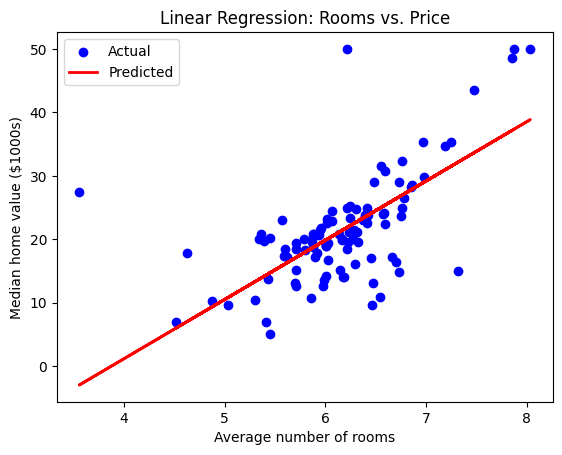

In [1]:
# 1. Imports and data loading
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load Boston Housing dataset
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)

# 2. Select feature and target
X = df[['rm']]         # average rooms per dwelling
y = df['medv']         # median home value in $1000s

# 3. Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# 4. Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# 5. Make predictions
y_pred = model.predict(X_test)

# 6. Evaluate
mse = mean_squared_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score:          {r2:.2f}")

# 7. Visualize
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred,  color='red',  label='Predicted', linewidth=2)
plt.xlabel("Average number of rooms")
plt.ylabel("Median home value ($1000s)")
plt.title("Linear Regression: Rooms vs. Price")
plt.legend()
plt.show()


### Activity 2. Logistic Regression

In [3]:
# 1. Imports and sample data
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#texts: A list of 12 short movie reviews.
texts = [
    "I absolutely loved this movie, it was fantastic!",
    "What a terrible film. I hated every minute.",
    "An excellent performance by the lead actor.",
    "Awful plot and poor acting.",
    "Best movie of the year!",
    "The worst movie I have ever seen.",
    "I enjoyed the storyline and characters.",
    "Boring, dull, and too long.",
    "A masterpiece – truly inspiring.",
    "Not worth the time.",
    "It was okay, not great but not bad either.",
    "Terrible editing ruined it."
]
#labels: Corresponding sentiment labels — 1 for positive reviews, 0 for negative ones.
labels = [1,0,1,0,1,0,1,0,1,0,1,0]  # 1=Positive, 0=Negative

# 2. Vectorize text. This transforms the text into a bag-of-words representation.
# Each review becomes a numeric vector showing how many times each word appears. For example, if “terrible” appears once in review 2, that position in the vector will be 1.

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts)

# 3. Train/test split. 75% of the data goes to training (X_train, y_train)
# 25% goes to testing (X_test, y_test). This helps evaluate the model on data it hasn't seen during training.

X_train, X_test, y_train, y_test = train_test_split(
    X, labels, test_size=0.25, random_state=42)

# 4. Train the Logistic Regression model. The logistic regression model is trained on the word count vectors and their labels. It learns which words are strong indicators of positive or negative sentiment.

clf = LogisticRegression(max_iter=200)
clf.fit(X_train, y_train)

# 5. Predict and evaluate. The trained model predicts the sentiment for each review in the test set.
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 6. Predict on new samples
new_reviews = [
    "What a fantastic and thrilling experience!",
    "I will never watch that movie again."
]
X_new = vectorizer.transform(new_reviews)
preds = clf.predict(X_new)
for review, p in zip(new_reviews, preds):
    label = "Positive" if p==1 else "Negative"
    print(f"Review: \"{review}\" → {label}")


Accuracy: 0.0

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       2.0

    accuracy                           0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0

Confusion Matrix:
 [[0 1]
 [2 0]]
Review: "What a fantastic and thrilling experience!" → Negative
Review: "I will never watch that movie again." → Negative


### Activity 3. Decision Trees

Test accuracy: 0.9777777777777777


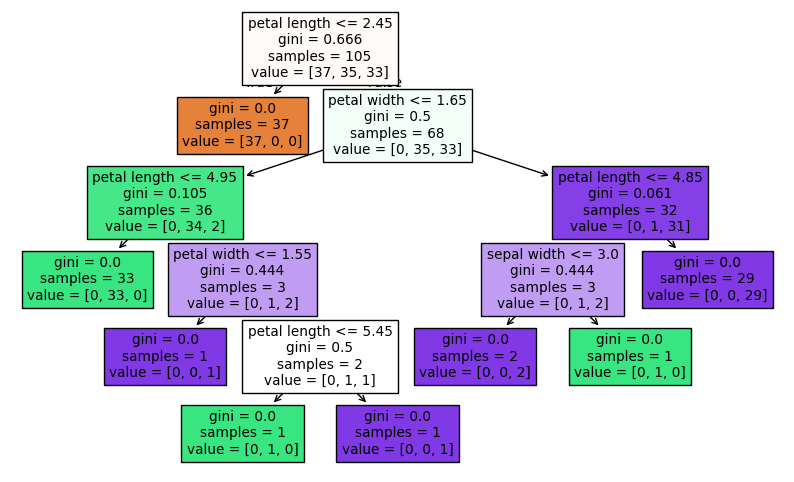

In [4]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load dataset
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Train model
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Accuracy
print("Test accuracy:", clf.score(X_test, y_test))

# Visualize tree
plt.figure(figsize=(10, 6))
plot_tree(clf, filled=True, feature_names=['sepal length', 'sepal width', 'petal length', 'petal width'])
plt.show()


### Activity 4.  k-Nearest Neighbors (k-NN)

In [5]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Load handwritten digits
X, y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Train model
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

# Accuracy
print("Test Accuracy:", model.score(X_test, y_test))


Test Accuracy: 0.9814814814814815


### Activity 5. Naïve Bayes Algorithm

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

texts = [
    "Win money now!", "Meeting at 3PM", "Earn cash quickly", 
    "Project deadline is tomorrow", "Free trip waiting for you!", "Lunch today?"
]
labels = [1, 0, 1, 0, 1, 0]  # 1 = spam, 0 = not spam

# Convert text to vectors
vec = CountVectorizer()
X = vec.fit_transform(texts)
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.3)

# Train model
nb = MultinomialNB()
nb.fit(X_train, y_train)

# Predict
y_pred = nb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.5
